In [26]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
path = os.getcwd() + '/ex1data1.txt'  
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [27]:
data.describe()  

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [20]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

data.insert(0, 'Ones', 1)


cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

computeCost(X, y, theta)



32.072733877455676

In [40]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameter = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T)-y
        
        for j in range(parameter):
            term = np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j] - (alpha/len(X))*np.sum(term)
            
        theta = temp
        cost[i] = computeCost(X,y,theta)
        
    return theta,cost
            

In [41]:
alpha = 0.01
iters = 1000
g,cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [42]:
cost

array([ 6.73719046,  5.93159357,  5.90115471,  5.89522859,  5.89009494,
        5.88500416,  5.87993248,  5.87487909,  5.86984391,  5.86482687,
        5.85982789,  5.85484692,  5.84988389,  5.84493874,  5.8400114 ,
        5.83510181,  5.8302099 ,  5.82533562,  5.82047889,  5.81563965,
        5.81081784,  5.8060134 ,  5.80122627,  5.79645638,  5.79170367,
        5.78696808,  5.78224955,  5.77754801,  5.77286341,  5.76819568,
        5.76354477,  5.75891061,  5.75429313,  5.7496923 ,  5.74510803,
        5.74054027,  5.73598897,  5.73145406,  5.72693549,  5.72243319,
        5.71794711,  5.71347718,  5.70902336,  5.70458558,  5.70016379,
        5.69575792,  5.69136792,  5.68699373,  5.6826353 ,  5.67829257,
        5.67396548,  5.66965398,  5.665358  ,  5.6610775 ,  5.65681242,
        5.6525627 ,  5.64832829,  5.64410913,  5.63990517,  5.63571635,
        5.63154261,  5.62738391,  5.6232402 ,  5.6191114 ,  5.61499748,
        5.61089837,  5.60681403,  5.60274441,  5.59868944,  5.59

In [43]:
computeCost(X,y,g)

4.5159555030789118

Text(0.5,1,'Predicted Profit vs. Population Size')

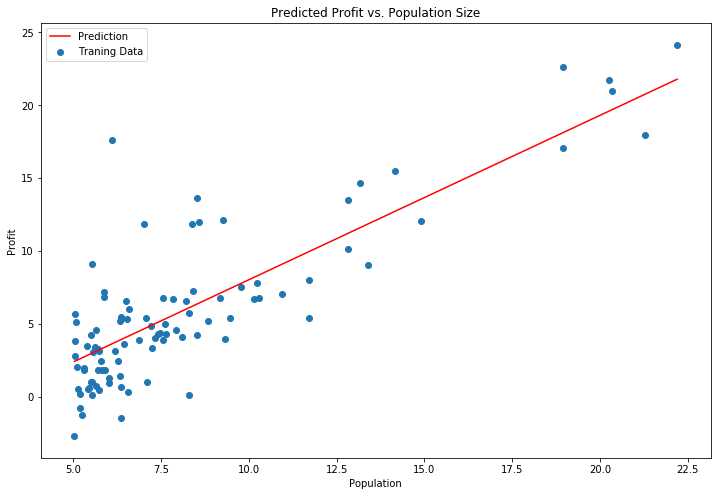

In [44]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0] + (g[0,1]*x)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size') 

Text(0.5,1,'Error vs. Training Epoch')

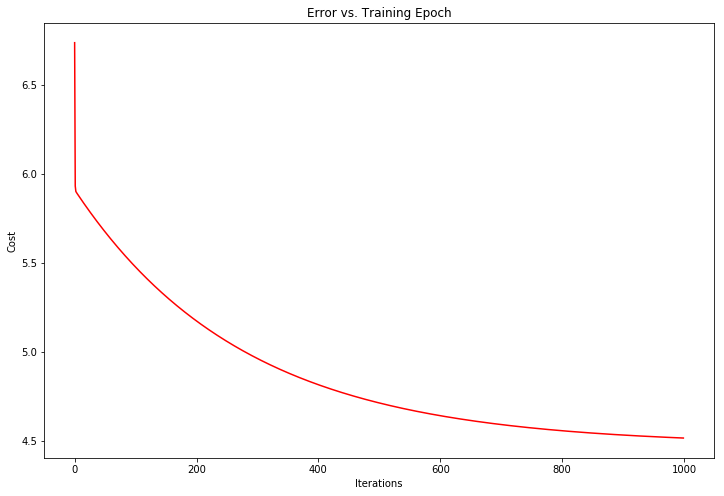

In [22]:
g, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [21]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Predicted Profit vs. Population Size')

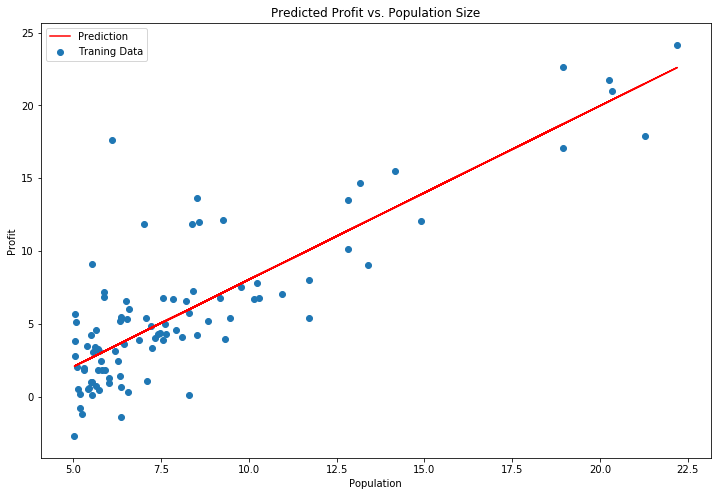

In [22]:
x = np.array(X[:, 1].A1)  
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

In [25]:
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])